Data downloaded from Kaggle 'stock-market-analysis-and-time-series-prediction'

https://www.kaggle.com/pierpaolo28/stock-market-analysis-and-time-series-prediction/data

Towards Datascience 'time-series-forecasting-predicting-stock-prices-using-python'

https://medium.com/@abiolafadeyi10/time-series-forecasting-predicting-stock-prices-using-python-87df91e1fe89

In [28]:
import pandas as pd
import numpy as np

import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.missing_values import fill_missing_values
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
)
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)

# Read Data

Date, 
- Open
- High
- Low
- Close: price when the stock market closes in the evening
- Volume: How much was sold during the day
- OpenInt: price when the stock market open in the morning

In [2]:
fp_acwi = './data/stocks/acwi.us.txt' # All World Country Index
fp_alfa = './data/stocks/alfa.us.txt'
fp_aom = './data/stocks/aom.us.txt'

df_acwi = pd.read_csv(fp_acwi, parse_dates=['Date']).set_index('Date').asfreq('D')
df_alfa = pd.read_csv(fp_alfa, parse_dates=['Date']).set_index('Date').asfreq('D')
df_aom = pd.read_csv(fp_aom, parse_dates=['Date']).set_index('Date').asfreq('D')

df_acwi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3515 entries, 2008-03-28 to 2017-11-10
Freq: D
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     2425 non-null   float64
 1   High     2425 non-null   float64
 2   Low      2425 non-null   float64
 3   Close    2425 non-null   float64
 4   Volume   2425 non-null   float64
 5   OpenInt  2425 non-null   float64
dtypes: float64(6)
memory usage: 192.2 KB


In [3]:
df_alfa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1985 entries, 2012-06-05 to 2017-11-10
Freq: D
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     1353 non-null   float64
 1   High     1353 non-null   float64
 2   Low      1353 non-null   float64
 3   Close    1353 non-null   float64
 4   Volume   1353 non-null   float64
 5   OpenInt  1353 non-null   float64
dtypes: float64(6)
memory usage: 108.6 KB


In [4]:
df_aom.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3287 entries, 2008-11-11 to 2017-11-10
Freq: D
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     2261 non-null   float64
 1   High     2261 non-null   float64
 2   Low      2261 non-null   float64
 3   Close    2261 non-null   float64
 4   Volume   2261 non-null   float64
 5   OpenInt  2261 non-null   float64
dtypes: float64(6)
memory usage: 179.8 KB


In [5]:
df_acwi.head(10)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2008-03-28,43.640,43.640,43.640,43.640,231.0,0.0
2008-03-29,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-31,43.553,43.553,42.964,42.964,459.0,0.0
2008-04-01,43.772,44.121,43.694,44.121,670.0,0.0
2008-04-02,48.528,48.528,44.468,44.608,12281.0,0.0
2008-04-03,52.004,52.004,44.382,44.860,33307.0,0.0
2008-04-04,44.426,47.866,44.426,44.835,11285.0,0.0
2008-04-05,NaN,NaN,NaN,NaN,NaN,NaN


# First Visualizations

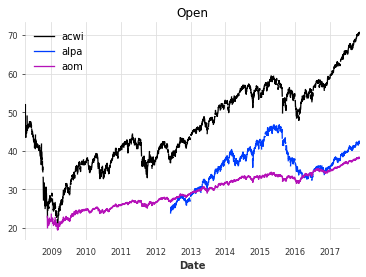

In [6]:
for df in [df_acwi, df_alfa, df_aom]:
    df['Open'].plot()
    
    plt.legend(['acwi', 'alpa', 'aom'])
plt.title('Open')  
plt.show()

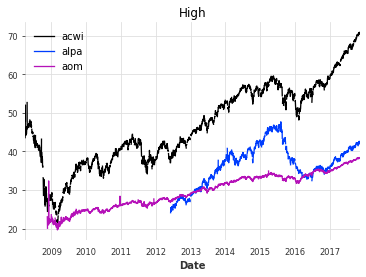

In [7]:
for df in [df_acwi, df_alfa, df_aom]:
    df['High'].plot()
    
    plt.legend(['acwi', 'alpa', 'aom'])
plt.title('High')  
plt.show()

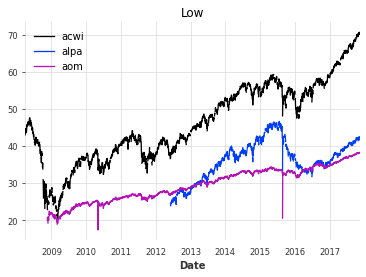

In [9]:
for df in [df_acwi, df_alfa, df_aom]:
    df['Low'].plot()
    
    plt.legend(['acwi', 'alpa', 'aom'])
plt.title('Low')  
plt.show()

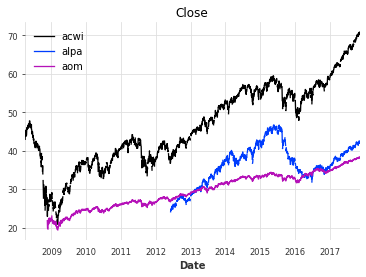

In [10]:
for df in [df_acwi, df_alfa, df_aom]:
    df['Close'].plot()
    
    plt.legend(['acwi', 'alpa', 'aom'])
plt.title('Close')  
plt.show()

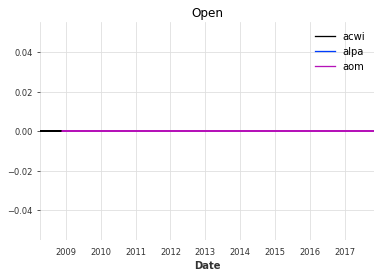

In [11]:
for df in [df_acwi, df_alfa, df_aom]:
    df['OpenInt'].plot()
    
    plt.legend(['acwi', 'alpa', 'aom'])
plt.title('Open')  
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


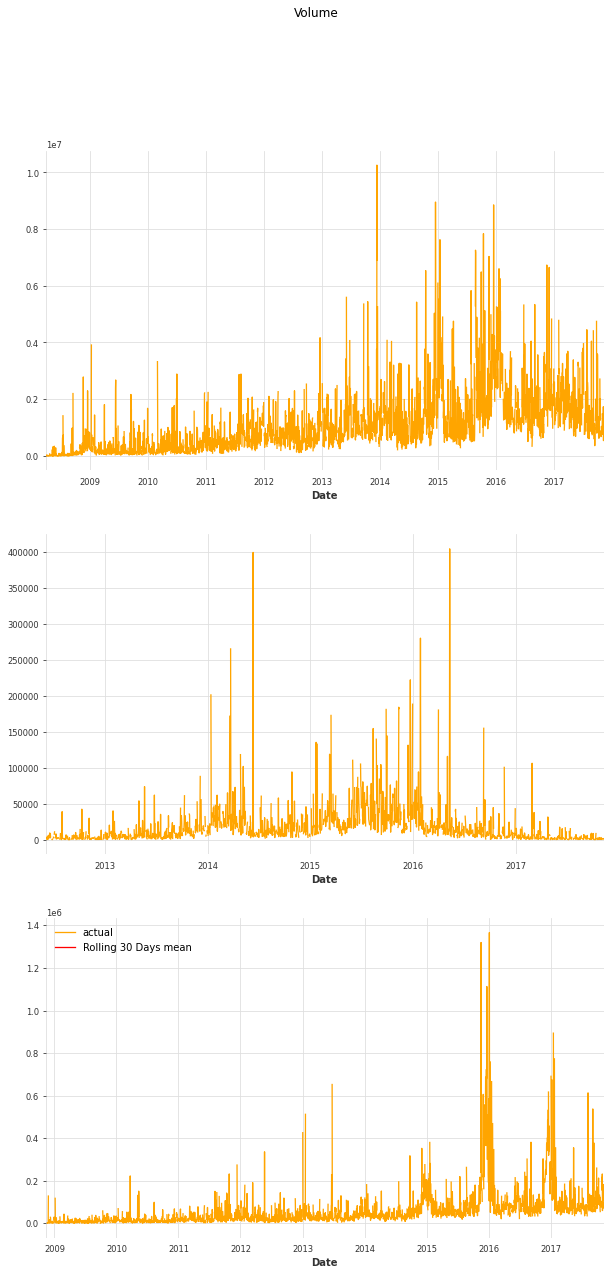

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(10, 20))
i=0
for df in [df_acwi, df_alfa, df_aom]:
    df['Volume'].plot(ax = ax[i], label='actual', color='orange')
    df['Volume'].rolling(30).mean().plot(ax = ax[i], label='Rolling 30 Days mean', color='r')
    i=i+1
    
    plt.legend()

plt.suptitle('Volume')  

plt.show()

# Darts - Forecast Open Price

In [13]:
df_acwi['Open']

Date
2008-03-28    43.640
2008-03-29       NaN
2008-03-30       NaN
2008-03-31    43.553
2008-04-01    43.772
               ...  
2017-11-06    70.570
2017-11-07    70.730
2017-11-08    70.710
2017-11-09    70.390
2017-11-10    70.370
Freq: D, Name: Open, Length: 3515, dtype: float64

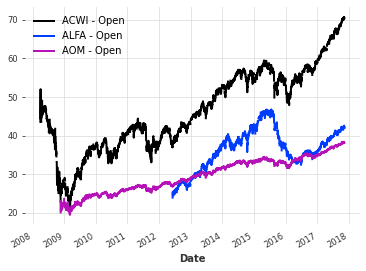

In [14]:
series_acwi = TimeSeries.from_series(df_acwi['Open'])
series_alfa = TimeSeries.from_series(df_alfa['Open'])
series_aom = TimeSeries.from_series(df_aom['Open'])

series_acwi.plot(label="ACWI - Open")
series_alfa.plot(label="ALFA - Open")
series_aom.plot(label="AOM - Open")
plt.legend()

plt.show()

## Pre-processing

In [41]:
series_acwi = fill_missing_values(series_acwi, 'auto')
series_alfa = fill_missing_values(series_alfa, 'auto')
series_aom = fill_missing_values(series_aom, 'auto')

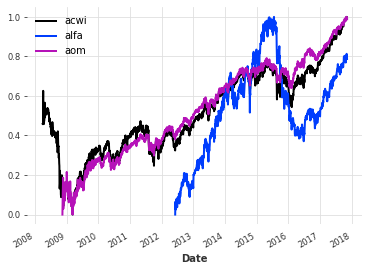

In [42]:
scaler_acwi, scaler_alfa, scaler_aom = Scaler(), Scaler(), Scaler()
series_acwi_scaled = scaler_acwi.fit_transform(series_acwi)
series_alfa_scaled = scaler_alfa.fit_transform(series_alfa)
series_aom_scaled = scaler_aom.fit_transform(series_aom)

series_acwi_scaled.plot(label="acwi")
series_alfa_scaled.plot(label="alfa")
series_aom_scaled.plot(label="aom")
plt.legend()
plt.show()

## Split Train-Validation

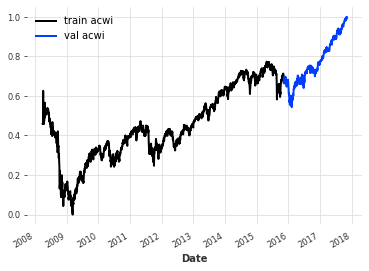

In [43]:
train_acwi, val_acwi = series_acwi_scaled[:-730], series_acwi_scaled[-730:]
train_alfa, val_alfa = series_alfa_scaled[:-730], series_alfa_scaled[-730:]
train_aom, val_aom = series_aom_scaled[:-730], series_aom_scaled[-730:]


train_acwi.plot(label="train acwi")
val_acwi.plot(label="val acwi")

#train_alfa.plot(label="train alfa")
#val_alfa.plot(label="val alfa")
#
#train_aom.plot(label="train aom")
#val_aom.plot(label="val aom")

plt.legend()
plt.show()

## Train Model on One Single Series

In [32]:
model_acwi = NBEATSModel(
    input_chunk_length=730, output_chunk_length=365, n_epochs=2, random_state=0
)

In [33]:
model_acwi.fit(train_acwi, verbose=True)

[2022-02-26 13:28:08,313] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1691 samples.
[2022-02-26 13:28:08,313] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1691 samples.
[2022-02-26 13:28:08,447] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-26 13:28:08,447] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-26 13:28:08,449] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning Trainer parameters `enable_progress_bar`, `progress_bar_refresh_rate` and `enable_model_summary` in the `pl_trainer_kwargs` dict at model creation.
[2022-02-26 13:28:08,449] WARNING | darts.models.forecasting.torch_forecasting_model | Depre

Training: 0it [00:00, ?it/s]

Predicting: 53it [00:00, ?it/s]

MAPE = 11.70%


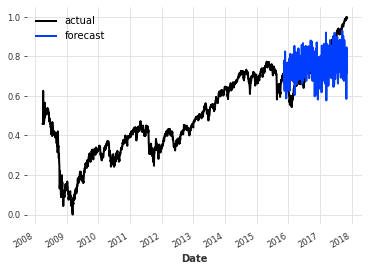

In [35]:
pred = model_acwi.predict(n=730)

series_acwi_scaled.plot(label="actual")
pred.plot(label="forecast")
plt.legend()
print("MAPE = {:.2f}%".format(mape(series_acwi_scaled, pred)))
plt.show()

## Train Model on all three Time Series

In [44]:
model_acwi_alfa_aom_milk = NBEATSModel(
    input_chunk_length=730, output_chunk_length=365, n_epochs=2, random_state=0
)

In [45]:
model_acwi_alfa_aom_milk.fit([train_acwi, train_alfa, train_aom], verbose=True)

[2022-02-26 13:36:46,398] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5073 samples.
[2022-02-26 13:36:46,398] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5073 samples.
[2022-02-26 13:36:46,574] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-26 13:36:46,574] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-26 13:36:46,578] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning Trainer parameters `enable_progress_bar`, `progress_bar_refresh_rate` and `enable_model_summary` in the `pl_trainer_kwargs` dict at model creation.
[2022-02-26 13:36:46,578] WARNING | darts.models.forecasting.torch_forecasting_model | Depre

Training: 0it [00:00, ?it/s]

Predicting: 159it [00:00, ?it/s]

MAPE = 12.59%


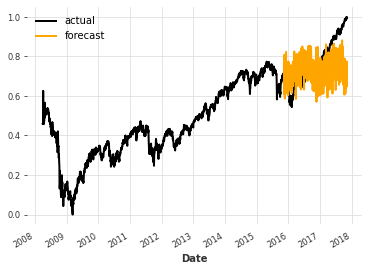

In [46]:
pred = model_acwi_alfa_aom_milk.predict(n=730, series=train_acwi)

series_acwi_scaled.plot(label="actual")
pred.plot(label="forecast", color='orange')
plt.legend()
print("MAPE = {:.2f}%".format(mape(series_acwi_scaled, pred)))
plt.show()

Predicting: 159it [00:00, ?it/s]

MAPE = 35.73%


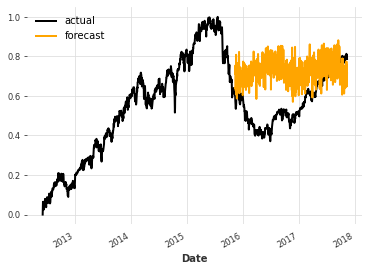

In [47]:
pred = model_acwi_alfa_aom_milk.predict(n=730, series=train_acwi)

series_alfa_scaled.plot(label="actual")
pred.plot(label="forecast", color='orange')
plt.legend()
print("MAPE = {:.2f}%".format(mape(series_alfa_scaled, pred)))
plt.show()

Predicting: 159it [00:00, ?it/s]

MAPE = 12.38%


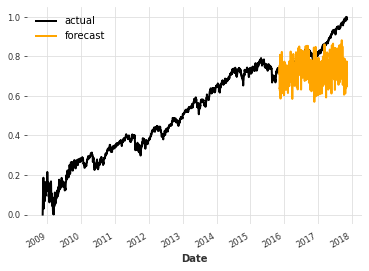

In [48]:
pred = model_acwi_alfa_aom_milk.predict(n=730, series=train_acwi)

series_aom_scaled.plot(label="actual")
pred.plot(label="forecast", color='orange')
plt.legend()
print("MAPE = {:.2f}%".format(mape(series_aom_scaled, pred)))
plt.show()